# Crosstab - Contingency Table

- Contingency table is a table which displays frequency distribution of variables.

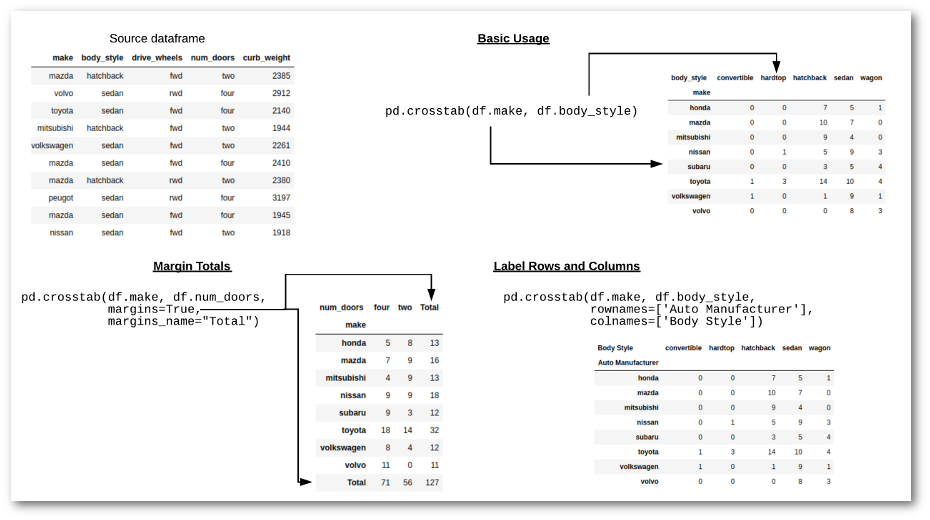

- Consider the following dataset:

In [2]:
import pandas as pd

df = pd.read_excel('data/survey.xls')
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


- Lets say, we want a contingency table with the following info: nationality vs handedness to answer the following questions:
    
    - How many Indians are left handed?
    
    - How many Chinese are right handed?

## `pd.crosstab()`

- `index` argument: the `Pandas Series` which will appear on the rows.

- `columns` argument: the field or a list of fields (`Pandas Series`) whose values will be the columns.

- `rownames` argument: the list of row names.

- `colnames` argument: the list of column names.

- `margins` argument: if set to `True`, the subtotal at each row is shown.

- `normalize` argument: if set to `True`, average is displayed instead of frequency count.

In [4]:
# Nationality vs Handedness
pd.crosstab(index=df['Nationality'], columns=df['Handedness'])

Handedness,Left,Right
Nationality,,
Bangadesh,2,0
China,2,1
India,2,1
USA,1,3


In [5]:
# margins -> subtotals
pd.crosstab(index=df.Nationality, columns=[df.Handedness, df.Sex], margins=True)

Handedness    Left       Right      All
Sex         Female Male Female Male    
Nationality                            
Bangadesh        1    1      0    0   2
China            1    1      1    0   3
India            0    2      0    1   3
USA              0    1      2    1   4
All              2    5      3    2  12

In [8]:
# rownames and colnames
pd.crosstab(
    index=df.Nationality,
    columns=[df.Handedness, df.Sex],
    rownames=['Country'],
    colnames=['Gender', 'Hand'],
    margins=True
)

Gender      Left       Right      All
Hand      Female Male Female Male    
Country                              
Bangadesh      1    1      0    0   2
China          1    1      1    0   3
India          0    2      0    1   3
USA            0    1      2    1   4
All            2    5      3    2  12

In [12]:
# Fraction instead of frequency
pd.crosstab(df.Nationality, df.Handedness, normalize=True)

Handedness,Left,Right
Nationality,,
Bangadesh,0.166667,0.000000
China,0.166667,0.083333
India,0.166667,0.083333
USA,0.083333,0.250000


In [17]:
# average age for each country, each gender
# 'values' -> df.Age and 'aggfunc' -> np.mean
import numpy as np

pd.crosstab(df.Nationality, df.Sex, values=df.Age, aggfunc=np.mean)

Sex,Female,Male
Nationality,,
Bangadesh,31.0,25.000000
China,55.0,43.000000
India,NaN,34.333333
USA,20.5,20.500000
